#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week.


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [3]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 1h, 1d, 1wk, 1mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [4]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

In [20]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2015-03-31' # to choose custom date ranges
        #,end = '2019-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2018-11-23,43.072498,19.379999,1502.060059,122.029999,1023.880005,46.540001,76.120003,103.070000,36.250000,159.210007,65.699997,63.470001,65.166000,35.959999,1
2018-11-26,43.654999,20.080000,1581.329956,126.410004,1048.619995,47.450001,80.559998,106.470001,38.262501,162.889999,65.690002,66.519997,69.199997,36.840000,2
2018-11-27,43.560001,21.049999,1581.420044,127.540001,1044.410034,48.070000,79.550003,107.139999,38.432499,163.440002,66.080002,65.879997,68.783997,36.799999,3
2018-11-28,45.235001,21.340000,1677.750000,140.639999,1086.229980,48.860001,83.989998,111.120003,40.017502,168.699997,66.820000,69.889999,69.573997,38.009998,4
2018-11-29,44.887501,21.430000,1673.569946,139.720001,1088.300049,47.700001,81.900002,110.190002,39.340000,168.149994,66.879997,69.900002,68.234001,37.930000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,151.000000,152.449997,3540.699951,307.089996,2981.520020,50.610001,585.030029,339.510010,302.029999,397.420013,112.230003,238.470001,1054.729980,118.080002,751
2021-11-17,153.490005,151.339996,3549.000000,308.019989,2981.239990,50.230000,570.000000,339.119995,292.609985,397.630005,112.519997,231.850006,1089.010010,119.059998,752
2021-11-18,157.869995,155.020004,3696.060059,302.989990,3014.179932,49.680000,567.789978,341.269989,316.750000,401.750000,112.900002,230.350006,1096.380005,123.389999,753


In [6]:
### in progress
# setting a rolling 260 days for each observed stock

df2 = df

for j in lista:
    df2[str(j) + ' roll'] = df2[str(j)].rolling(260).mean()

df2
#df2.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,GOOG roll,INTC roll,MDB roll,MSFT roll,NVDA roll,QQQ roll,SBUX roll,SQ roll,TSLA roll,TSM roll
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-23,43.072498,19.379999,1502.060059,122.029999,1023.880005,46.540001,76.120003,103.070000,36.250000,159.210007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-26,43.654999,20.080000,1581.329956,126.410004,1048.619995,47.450001,80.559998,106.470001,38.262501,162.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-27,43.560001,21.049999,1581.420044,127.540001,1044.410034,48.070000,79.550003,107.139999,38.432499,163.440002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-28,45.235001,21.340000,1677.750000,140.639999,1086.229980,48.860001,83.989998,111.120003,40.017502,168.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-29,44.887501,21.430000,1673.569946,139.720001,1088.300049,47.700001,81.900002,110.190002,39.340000,168.149994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,151.000000,152.449997,3540.699951,307.089996,2981.520020,50.610001,585.030029,339.510010,302.029999,397.420013,...,2350.332614,55.304308,366.821865,260.124230,172.782404,340.265270,110.103308,236.437076,716.137998,115.894731
2021-11-17,153.490005,151.339996,3549.000000,308.019989,2981.239990,50.230000,570.000000,339.119995,292.609985,397.630005,...,2355.016729,55.321808,368.040519,260.569730,173.363212,340.662347,110.187538,236.654846,718.641537,116.004846
2021-11-18,157.869995,155.020004,3696.060059,302.989990,3014.179932,49.680000,567.789978,341.269989,316.750000,401.750000,...,2359.833767,55.338308,369.253557,261.021846,174.021404,341.074424,110.273115,236.778961,721.204729,116.127846


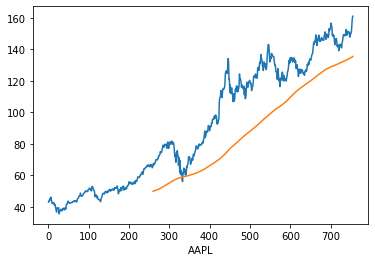

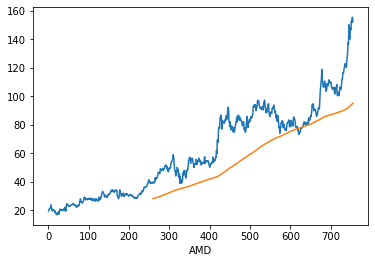

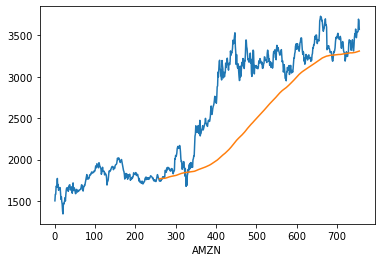

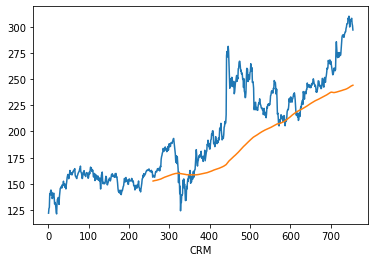

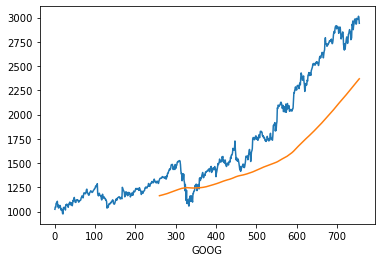

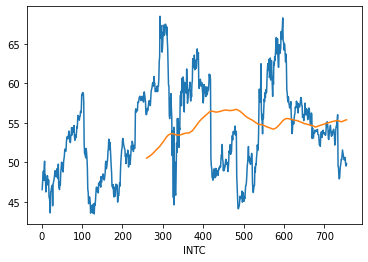

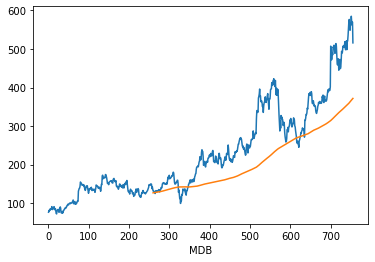

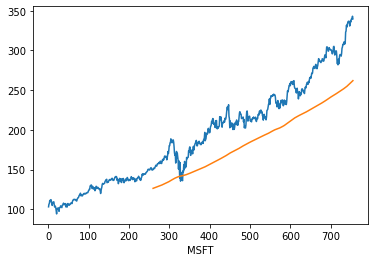

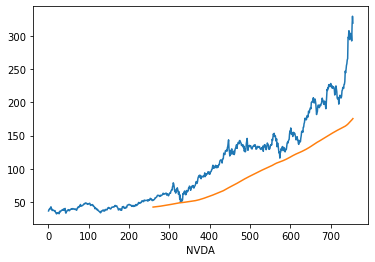

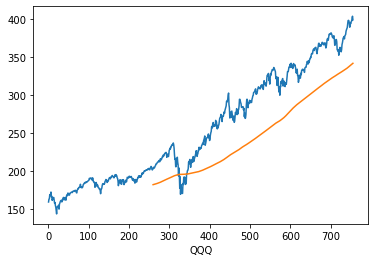

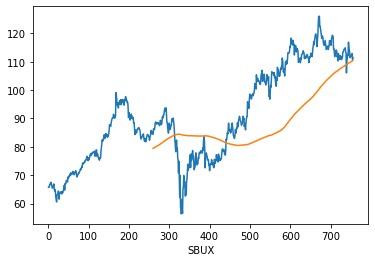

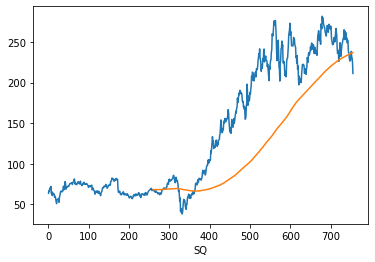

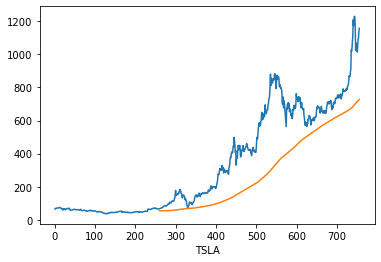

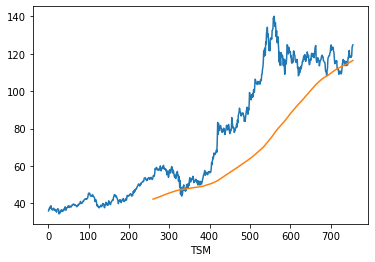

In [7]:
### in progress
# Not what I thought. I thought it would match the rolling linear predictions.
# This is a single point representing 260 days while the linear predition is a line representing 260 days
# I would have to do something weird like set a multiplier based on the gains/losses made in the last year
# but that sounds too iffy and made up

for j in lista:
    x = df2['Index']
    y = df2[str(j)]
    plt.plot(x, y)

    x = df2['Index']
    y = df2[str(j) + ' roll']
    plt.plot(x, y)

    plt.xlabel(j)
    plt.show()

In [40]:
### in progress
# now that I know I don't want a rolling average, find out how to more simply do a rolling linear regression
# goal is to avoid having to make 50 dataframes

# https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingOLS.html

# issue - I need every iteration to have a fresh 1-260 as opposed to 1-260, then 2-261, etc
    # I can't read from a stagnant list to do this

mod = RollingOLS.from_formula("TSM ~ Index", data=df, window=260)
rres = mod.fit()
df3 = rres.params
df3['TSM'] = df['TSM']
df3['Pred'] = df3['Intercept']+(df3['Index']*260)
df3

#df3.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

,Intercept,Index,TSM,Pred
Date,,,,
2018-11-23,NaN,NaN,35.959999,NaN
2018-11-26,NaN,NaN,36.840000,NaN
2018-11-27,NaN,NaN,36.799999,NaN
2018-11-28,NaN,NaN,38.009998,NaN
2018-11-29,NaN,NaN,37.930000,NaN
...,...,...,...,...
2021-11-16,99.480479,0.026411,118.080002,106.347262
2021-11-17,100.802364,0.024422,119.059998,107.151995
2021-11-18,101.860152,0.022883,123.389999,107.809792


In [51]:
mod = RollingOLS.from_formula("TSM ~ Index", data=df, window=260)
test = mod.fit()
test

In [23]:
range(260)

range(0, 260)

In [8]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-260
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10
        y -= 10

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2020-11-06  118.690002   85.879997  3311.370117  260.149994  1761.750000   
2020-11-09  116.320000   83.120003  3143.739990  259.279999  1763.000000   
2020-11-10  115.970001   77.989998  3035.020020  247.660004  1740.390015   
2020-11-11  119.489998   81.279999  3137.389893  254.179993  1752.709961   
2020-11-12  119.209999   81.839996  3110.280029  249.419998  1749.839966   
...                ...         ...          ...         ...          ...   
2021-11-11  147.869995  146.009995  3472.500000  302.980011  2934.959961   
2021-11-12  149.990005  147.889999  3525.149902  306.649994  2992.909912   
2021-11-15  150.000000  146.490005  3545.679932  305.489990  2987.760010   
2021-11-16  151.000000  152.449997  3540.699951  307.089996  2981.520020   
2021-11-17  153.490005  151.339996  3549.000000  308.019989  2981.239990   

           

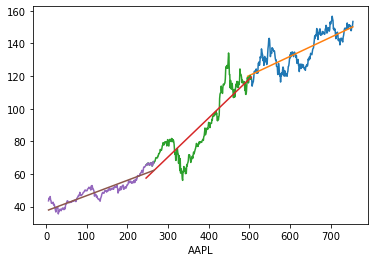

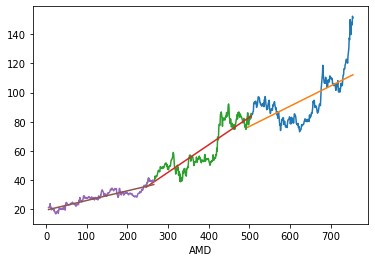

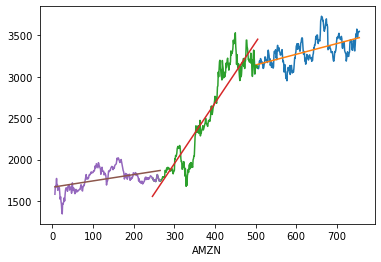

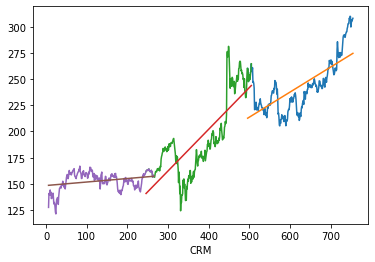

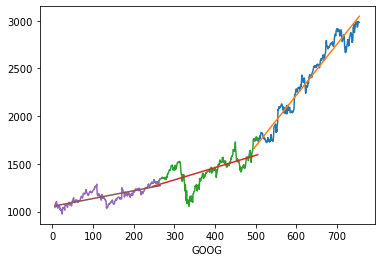

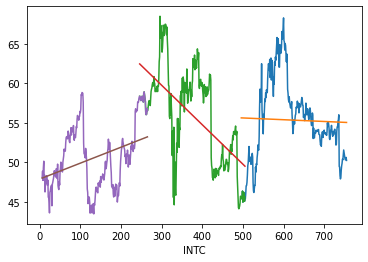

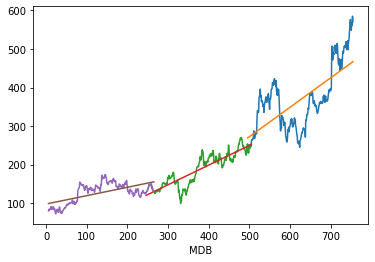

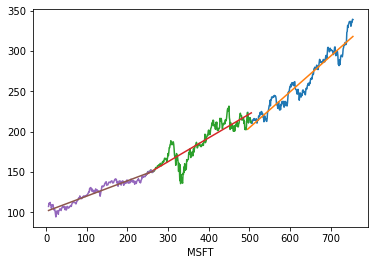

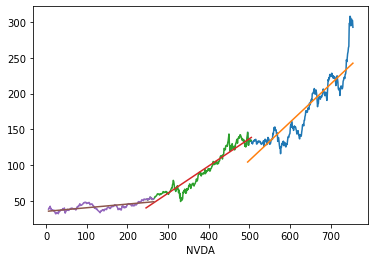

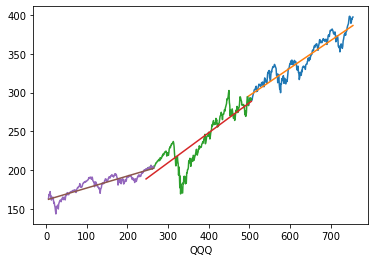

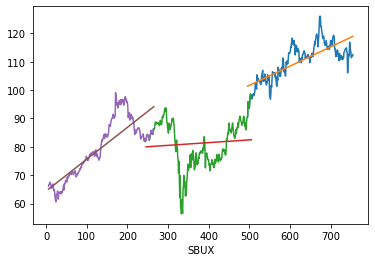

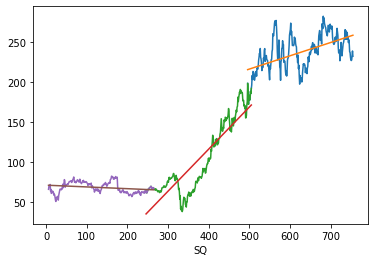

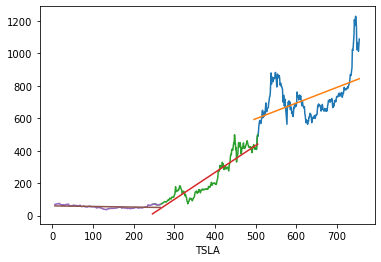

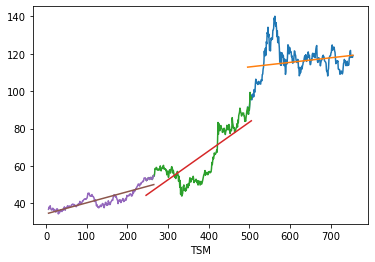

In [6]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

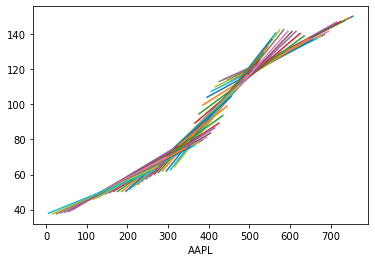

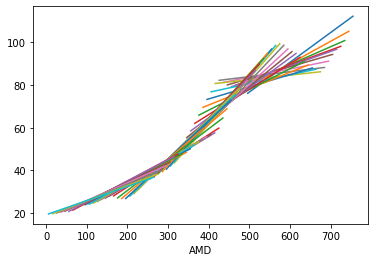

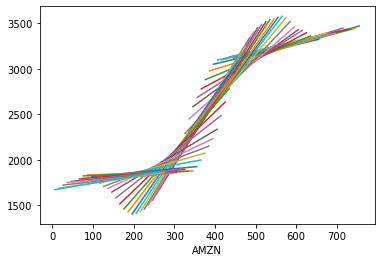

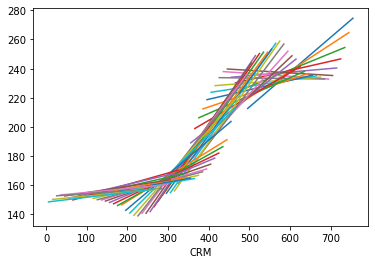

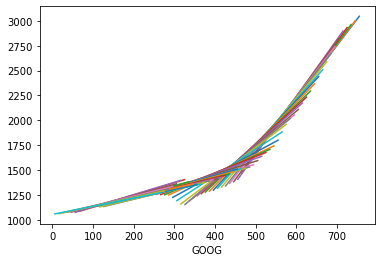

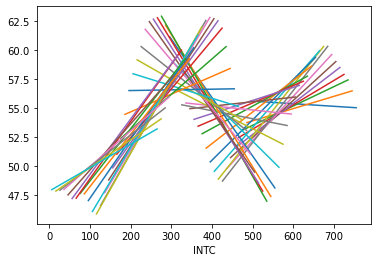

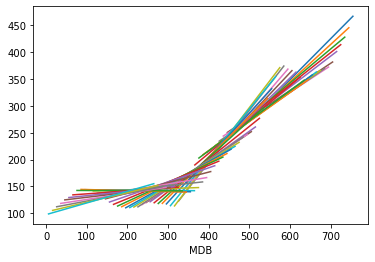

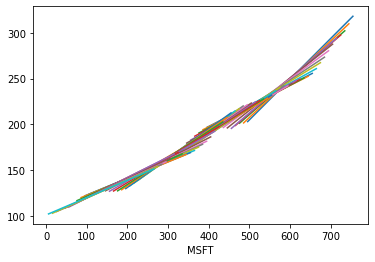

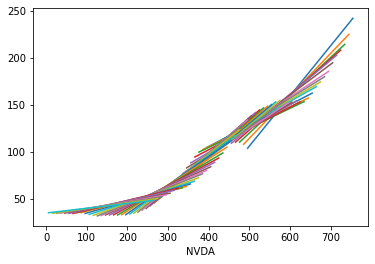

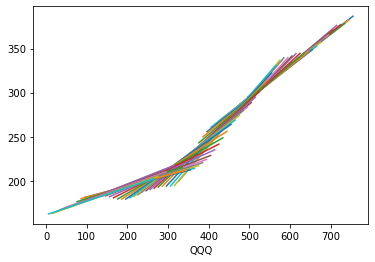

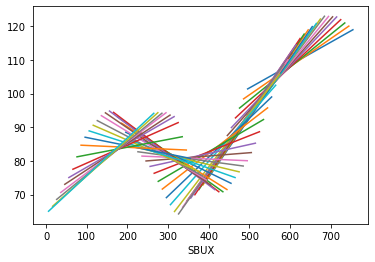

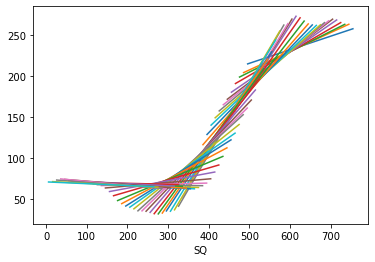

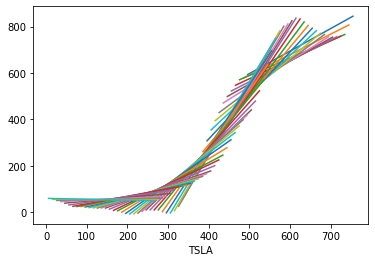

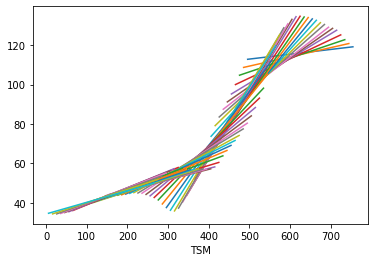

In [7]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [8]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(260)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

<ipython-input-8-99fb616fb7ac>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred'] = nlist
<ipython-input-8-99fb616fb7ac>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-06,118.690002,85.879997,3311.370117,260.149994,1761.750000,45.389999,252.399994,223.720001,145.619995,294.609985,...,295.070845,1.001564,101.465571,1.119311,215.365956,1.087268,593.966252,1.381477,112.866663,1.234730
2020-11-09,116.320000,83.120003,3143.739990,259.279999,1763.000000,45.599998,239.889999,218.389999,136.307495,288.589996,...,295.425643,1.023686,101.533446,1.058964,215.531628,1.170858,594.936487,1.412279,112.891085,1.268012
2020-11-10,115.970001,77.989998,3035.020020,247.660004,1740.390015,45.439999,230.059998,211.009995,127.699997,283.420013,...,295.780440,1.043612,101.601321,1.081786,215.697301,1.254054,595.906723,1.452156,112.915506,1.288107
2020-11-11,119.489998,81.279999,3137.389893,254.179993,1752.709961,46.349998,245.089996,216.550003,134.179993,289.760010,...,296.135238,1.022002,101.669197,1.069752,215.862973,1.176878,596.876959,1.430914,112.939928,1.242737
2020-11-12,119.209999,81.839996,3110.280029,249.419998,1749.839966,44.950001,251.020004,215.440002,134.567505,288.399994,...,296.490036,1.028051,101.737072,1.087748,216.028645,1.210177,597.847194,1.451931,112.964350,1.257675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,147.869995,146.009995,3472.500000,302.980011,2934.959961,50.529999,548.679993,332.429993,303.899994,390.589996,...,385.544254,0.987082,118.773755,1.065809,257.612391,1.137311,841.376351,0.791132,119.094186,1.007650
2021-11-12,149.990005,147.889999,3525.149902,306.649994,2992.909912,50.310001,566.830017,336.720001,303.899994,394.700012,...,385.899051,0.977702,118.841631,1.063745,257.778063,1.134087,842.346587,0.815106,119.118608,1.003611
2021-11-15,150.000000,146.490005,3545.679932,305.489990,2987.760010,50.320000,561.890015,336.070007,300.250000,394.609985,...,386.253849,0.978824,118.909506,1.062926,257.943735,1.106960,843.316822,0.832174,119.143029,1.008661


In [9]:
# pull the last 'close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    zlist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))
        zlist.append(round(dataframes['data' + str(e)][str(j) + ' pred'].iloc[k-1],2))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred'] = pd.DataFrame(zlist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,SBUX pred/close,SQ,SQ pred,SQ pred/close,TSLA,TSLA pred,TSLA pred/close,TSM,TSM pred,TSM pred/close
40,41,145.64,137.49,0.9441,90.26,87.47,0.9691,3677.3601,3349.87,0.9109,...,1.0122,241.43,262.69,1.0881,668.54,783.68,1.1722,123.90,132.85,1.0722
41,42,146.77,138.89,0.9463,91.03,86.23,0.9473,3626.3899,3395.17,0.9362,...,0.9707,251.73,263.38,1.0463,644.78,772.29,1.1978,113.54,131.59,1.1590
42,43,145.60,139.78,0.9601,106.48,88.26,0.8289,3320.6799,3401.99,1.0245,...,1.0580,273.08,265.99,0.9741,709.99,766.93,1.0802,116.36,130.67,1.1230
43,44,149.62,141.70,0.9471,107.65,91.20,0.8472,3305.7800,3392.73,1.0263,...,1.0695,270.17,268.11,0.9924,708.49,756.72,1.0681,112.11,129.25,1.1529
44,45,155.11,144.66,0.9326,106.17,94.40,0.8892,3525.5000,3418.83,0.9697,...,1.0416,254.72,270.19,1.0607,753.87,755.28,1.0019,121.89,128.67,1.0556
45,46,145.85,146.95,1.0075,104.38,96.81,0.9275,3380.0500,3451.01,1.0210,...,1.0870,261.07,269.20,1.0311,751.94,756.62,1.0062,115.87,127.70,1.1021
46,47,142.00,147.33,1.0375,103.64,98.19,0.9474,3262.0100,3438.69,1.0542,...,1.0935,239.12,265.93,1.1121,782.75,759.39,0.9702,109.34,125.31,1.1461
47,48,149.26,147.95,0.9912,116.39,100.92,0.8671,3415.0601,3437.20,1.0065,...,1.0635,255.35,263.78,1.0330,865.80,766.45,0.8853,115.59,122.85,1.0628
48,49,151.49,149.45,0.9865,130.53,105.28,0.8066,3384.0000,3449.75,1.0194,...,1.0669,252.48,263.83,1.0450,1213.86,807.60,0.6653,114.01,120.87,1.0602
49,50,153.49,150.32,0.9793,151.34,112.35,0.7424,3549.0000,3473.84,0.9788,...,1.0580,231.85,258.28,1.1140,1089.01,845.26,0.7762,119.06,119.19,1.0011


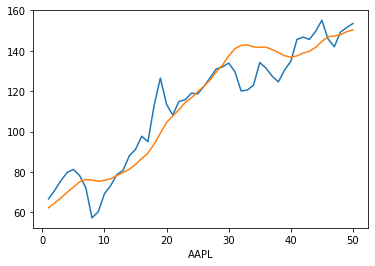

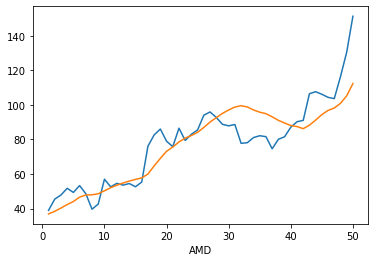

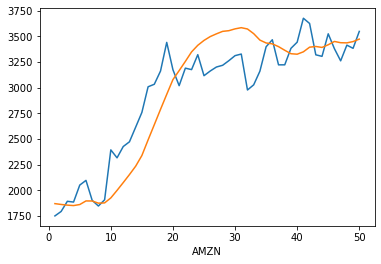

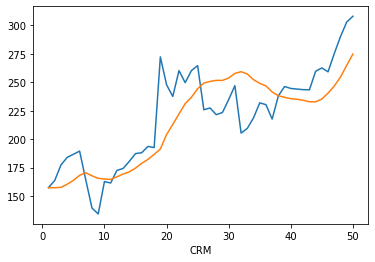

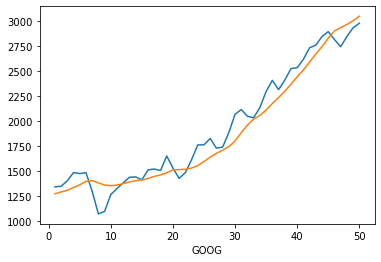

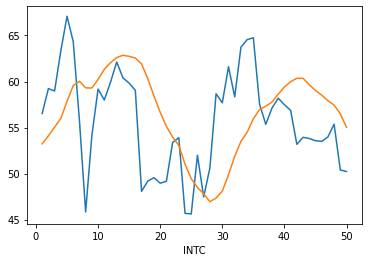

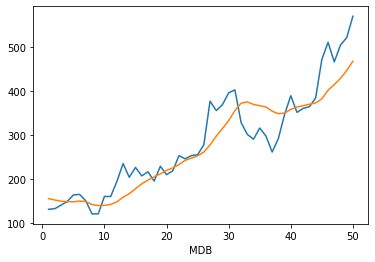

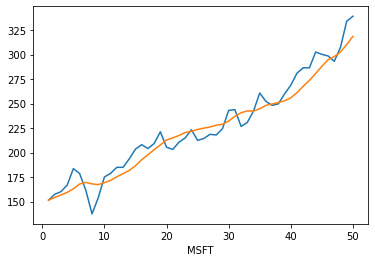

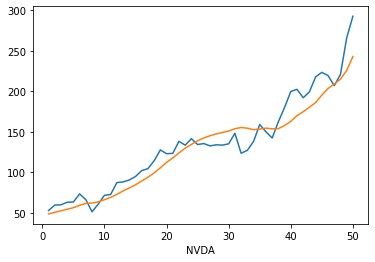

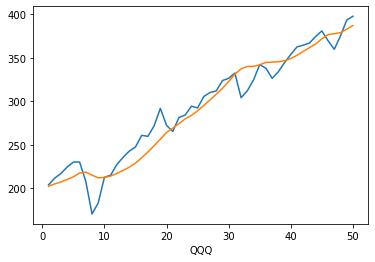

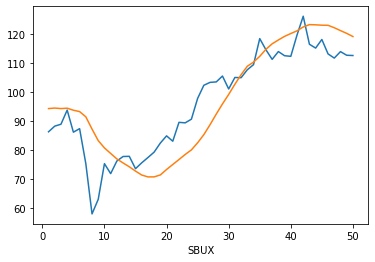

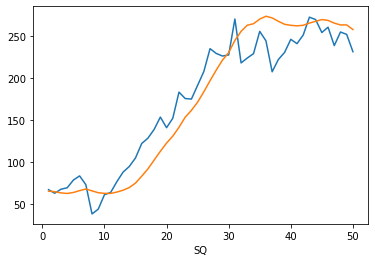

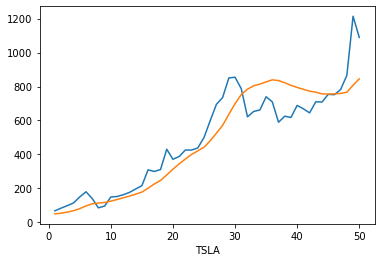

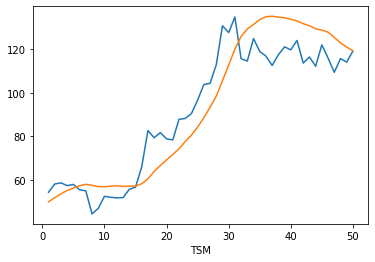

In [10]:
# plot for each stock the close price and the prediction price
# close (blue) below prediction (orange) = stock is underperforming

for i in lista:
    x = df['Index']
    y = df[str(i)]
    plt.plot(x, y)

    x = df['Index']
    y = df[str(i) + ' pred']
    plt.plot(x, y)

    plt.xlabel(i)
    plt.show()

#### At this point, the foundation is set and strategies can be created and tested.

In [11]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG >1,INTC >1,MDB >1,MSFT >1,NVDA >1,QQQ >1,SBUX >1,SQ >1,TSLA >1,TSM >1
40,41,145.64,137.49,0.9441,90.26,87.47,0.9691,3677.3601,3349.87,0.9109,...,0,1,1,0,0,0,1,1,1,1
41,42,146.77,138.89,0.9463,91.03,86.23,0.9473,3626.3899,3395.17,0.9362,...,0,1,1,0,0,0,0,1,1,1
42,43,145.60,139.78,0.9601,106.48,88.26,0.8289,3320.6799,3401.99,1.0245,...,0,1,1,0,0,0,1,0,1,1
43,44,149.62,141.70,0.9471,107.65,91.20,0.8472,3305.7800,3392.73,1.0263,...,0,1,0,0,0,0,1,0,1,1
44,45,155.11,144.66,0.9326,106.17,94.40,0.8892,3525.5000,3418.83,0.9697,...,0,1,0,0,0,0,1,1,1,1
45,46,145.85,146.95,1.0075,104.38,96.81,0.9275,3380.0500,3451.01,1.0210,...,1,1,0,0,0,1,1,1,1,1
46,47,142.00,147.33,1.0375,103.64,98.19,0.9474,3262.0100,3438.69,1.0542,...,1,1,0,1,1,1,1,1,0,1
47,48,149.26,147.95,0.9912,116.39,100.92,0.8671,3415.0601,3437.20,1.0065,...,1,1,0,0,0,1,1,1,0,1
48,49,151.49,149.45,0.9865,130.53,105.28,0.8066,3384.0000,3449.75,1.0194,...,1,1,0,0,0,0,1,1,0,1
49,50,153.49,150.32,0.9793,151.34,112.35,0.7424,3549.0000,3473.84,0.9788,...,1,1,0,0,0,0,1,1,0,1


In [12]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG pred/close2,INTC pred/close2,MDB pred/close2,MSFT pred/close2,NVDA pred/close2,QQQ pred/close2,SBUX pred/close2,SQ pred/close2,TSLA pred/close2,TSM pred/close2
40,41,145.64,137.49,0.9441,90.26,87.47,0.9691,3677.3601,3349.87,0.9109,...,0.9206,1.1122,1.0716,0.8636,0.7048,0.9477,1.0245,1.1840,1.3741,1.1496
41,42,146.77,138.89,0.9463,91.03,86.23,0.9473,3626.3899,3395.17,0.9362,...,0.8985,1.2878,1.0337,0.8724,0.8292,0.9608,0.9423,1.0947,1.4347,1.3433
42,43,145.60,139.78,0.9601,106.48,88.26,0.8289,3320.6799,3401.99,1.0245,...,0.9376,1.2519,1.0308,0.9128,0.8192,0.9714,1.1194,0.9489,1.1668,1.2611
43,44,149.62,141.70,0.9471,107.65,91.20,0.8472,3305.7800,3392.73,1.0263,...,0.9305,1.2288,0.9419,0.8603,0.7298,0.9547,1.1438,0.9849,1.1408,1.3292
44,45,155.11,144.66,0.9326,106.17,94.40,0.8892,3525.5000,3418.83,0.9697,...,0.9557,1.2144,0.6566,0.9201,0.7649,0.9528,1.0849,1.1251,1.0038,1.1143
45,46,145.85,146.95,1.0075,104.38,96.81,0.9275,3380.0500,3451.01,1.0210,...,1.0613,1.1966,0.6191,0.9738,0.8604,1.0382,1.1816,1.0632,1.0124,1.2146
46,47,142.00,147.33,1.0375,103.64,98.19,0.9474,3262.0100,3438.69,1.0542,...,1.1438,1.1511,0.7909,1.0337,1.0189,1.1019,1.1957,1.2368,0.9413,1.3135
47,48,149.26,147.95,0.9912,116.39,100.92,0.8671,3415.0601,3437.20,1.0065,...,1.0868,1.0762,0.7222,0.9690,0.9471,1.0207,1.1310,1.0671,0.7838,1.1295
48,49,151.49,149.45,0.9865,130.53,105.28,0.8066,3384.0000,3449.75,1.0194,...,1.0486,1.2569,0.7332,0.8630,0.7206,0.9477,1.1383,1.0920,0.4426,1.1240
49,50,153.49,150.32,0.9793,151.34,112.35,0.7424,3549.0000,3473.84,0.9788,...,1.0478,1.2003,0.6735,0.8825,0.6896,0.9471,1.1194,1.2410,0.6025,1.0022


In [13]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,TSM baseline,TSM baseline_stk,TSM opt1,TSM opt1_stk,TSM opt2,TSM opt2_stk,TSM opt3,TSM opt3_stk,TSM opt4,TSM opt4_stk
40,41,145.64,137.49,0.9441,90.26,87.47,0.9691,3677.3601,3349.87,0.9109,...,10,0.0807,10.722,0.0865,11.496,0.0928,20,0.1614,9.3266,0.0753
41,42,146.77,138.89,0.9463,91.03,86.23,0.9473,3626.3899,3395.17,0.9362,...,10,0.0881,11.590,0.1021,13.433,0.1183,20,0.1761,8.6281,0.0760
42,43,145.60,139.78,0.9601,106.48,88.26,0.8289,3320.6799,3401.99,1.0245,...,10,0.0859,11.230,0.0965,12.611,0.1084,20,0.1719,8.9047,0.0765
43,44,149.62,141.70,0.9471,107.65,91.20,0.8472,3305.7800,3392.73,1.0263,...,10,0.0892,11.529,0.1028,13.292,0.1186,20,0.1784,8.6738,0.0774
44,45,155.11,144.66,0.9326,106.17,94.40,0.8892,3525.5000,3418.83,0.9697,...,10,0.0820,10.556,0.0866,11.143,0.0914,20,0.1641,9.4733,0.0777
45,46,145.85,146.95,1.0075,104.38,96.81,0.9275,3380.0500,3451.01,1.0210,...,10,0.0863,11.021,0.0951,12.146,0.1048,20,0.1726,9.0736,0.0783
46,47,142.00,147.33,1.0375,103.64,98.19,0.9474,3262.0100,3438.69,1.0542,...,10,0.0915,11.461,0.1048,13.135,0.1201,0,0.0000,8.7252,0.0798
47,48,149.26,147.95,0.9912,116.39,100.92,0.8671,3415.0601,3437.20,1.0065,...,10,0.0865,10.628,0.0919,11.295,0.0977,0,0.0000,9.4091,0.0814
48,49,151.49,149.45,0.9865,130.53,105.28,0.8066,3384.0000,3449.75,1.0194,...,10,0.0877,10.602,0.0930,0.000,0.0000,0,0.0000,9.4322,0.0827
49,50,153.49,150.32,0.9793,151.34,112.35,0.7424,3549.0000,3473.84,0.9788,...,10,0.0840,0.000,0.0000,0.000,0.0000,0,0.0000,0.0000,0.0000


In [14]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit   diff  %_diff
0  AAPL baseline     500.00       4.7755  232.99   0.00    0.00
1       AAPL op1     491.65       4.7513  237.62   4.63    1.95
2       AAPL op2     498.35       4.8524  246.44  13.45    5.46
3       AAPL op3     420.00       3.9994  193.87 -39.12  -20.18
4       AAPL op4     493.11       4.7247  232.08  -0.91   -0.39

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       7.0602  568.49   0.00    0.00
1       AMD op1     492.70       7.0010  566.84  -1.65   -0.29
2       AMD op2     494.54       7.0655  574.76   6.27 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [15]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in,CRM bought_in,GOOG bought_in,INTC bought_in,MDB bought_in,MSFT bought_in,NVDA bought_in,QQQ bought_in,SBUX bought_in,SQ bought_in,TSLA bought_in,TSM bought_in
0,500.00,500.00,500.00,500.00,500.0,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
1,491.65,492.70,496.48,492.70,489.2,489.18,487.42,494.08,477.31,496.03,494.70,490.82,462.82,494.50
2,498.35,494.54,497.16,492.01,481.6,494.22,486.52,489.83,461.69,494.11,495.09,488.02,453.61,495.98
3,420.00,380.00,500.00,360.00,240.0,500.00,380.00,380.00,300.00,280.00,500.00,440.00,340.00,500.00
4,493.11,490.89,497.75,491.44,494.3,495.23,489.40,496.90,496.08,495.61,491.46,499.10,494.66,493.88


In [16]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit,CRM profit,GOOG profit,INTC profit,MDB profit,MSFT profit,NVDA profit,QQQ profit,SBUX profit,SQ profit,TSLA profit,TSM profit
0,232.99,568.49,133.14,227.30,340.71,-45.17,688.79,285.88,818.94,210.13,104.63,413.67,1490.38,231.70
1,237.62,566.84,130.63,230.60,341.37,-42.43,693.00,286.03,781.38,210.48,110.50,431.75,1261.19,236.41
2,246.44,574.76,129.24,237.13,344.50,-39.12,712.36,287.74,756.21,212.32,120.53,493.33,1153.88,244.85
3,193.87,471.80,102.27,199.61,194.07,-30.24,625.88,251.34,454.70,113.97,107.17,288.61,627.15,261.33
4,232.08,577.58,137.16,226.37,344.03,-48.29,696.99,286.88,864.93,211.45,101.81,429.99,1872.19,230.82


In [17]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff,CRM diff,GOOG diff,INTC diff,MDB diff,MSFT diff,NVDA diff,QQQ diff,SBUX diff,SQ diff,TSLA diff,TSM diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,4.63,-1.65,-2.51,3.30,0.66,2.74,4.21,0.15,-37.56,0.35,5.87,18.08,-229.19,4.71
2,13.45,6.27,-3.90,9.83,3.79,6.05,23.57,1.86,-62.73,2.19,15.90,79.66,-336.50,13.15
3,-39.12,-96.69,-30.87,-27.69,-146.64,14.93,-62.91,-34.54,-364.24,-96.16,2.54,-125.06,-863.23,29.63
4,-0.91,9.09,4.02,-0.93,3.32,-3.12,8.20,1.00,45.99,1.32,-2.82,16.32,381.81,-0.88


In [18]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  November 17, 2021 17:44:49

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

-226.21 opt1 profit/loss over baseline. 5475.37 core profit on 6849.59 investment. -3.97 percent above/below baseline profit.
-227.41 opt2 profit/loss over baseline. 5474.17 core profit on 6822.73 investment. -3.99 percent above/below baseline profit.
-1840.05 opt3 profit/loss over baseline. 3861.53 core profit on 5520.0 investment. -32.27 percent above/below baseline profit.
462.41 opt4 profit/loss over baseline. 6163.99 core profit on 6919.81 investment. 8.11 percent above/below baseline profit.


In [19]:
print("Using one of the strategies, today's buy in values are listed.")

now = pd.DataFrame()
opts = ['opt1', 'opt2', 'opt3', 'opt4']
now['method'] = opts

for j in lista:
    nlist = []
    for i in range(1, len(opts)+1):
        if i == 1: 
            x = biwkly_contrib * df[str(j) + ' pred/close'].iloc[49]
        elif i == 2:
            x = biwkly_contrib * df[str(j) + ' pred/close2'].iloc[49]
        elif i == 3:
            x = biwkly_contrib * 2 * df[str(j) + ' >1'].iloc[49]
        elif i == 4: 
            x = biwkly_contrib / df[str(j) + ' pred/close'].iloc[49]
        else: -1
        nlist.append(round(x,2))
    now[str(j)] = nlist

now

Using one of the strategies, today's buy in values are listed.


,method,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
0,opt1,9.79,7.42,9.79,8.92,10.24,10.96,8.21,9.39,8.30,9.73,10.58,11.14,7.76,10.01
1,opt2,9.59,5.51,9.58,7.96,10.48,12.00,6.74,8.82,6.90,9.47,11.19,12.41,6.02,10.02
2,opt3,0.00,0.00,0.00,0.00,20.00,20.00,0.00,0.00,0.00,0.00,20.00,20.00,0.00,20.00
3,opt4,10.21,13.47,10.22,11.21,9.77,9.13,12.18,10.65,12.04,10.28,9.45,8.98,12.88,9.99


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.